       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa  
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


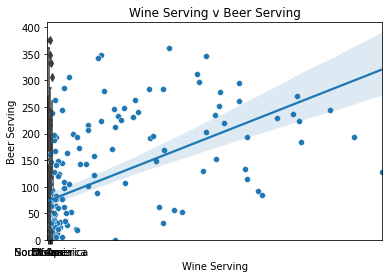

0.5271716935065209 3.378401743961718e-15
Intercept: 3.1540794346874996
Slope: [0.03160757]
Mean Squared Error: 7.851286122663144
R2 Score: 0.4456875459787605


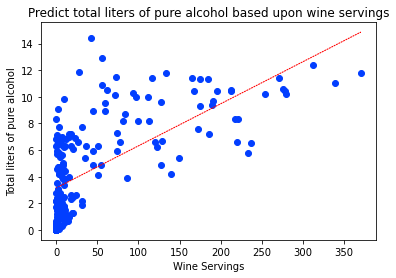

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

#Default returns first 5 rows
print(df.head())

#Display the data types for each column
print(df.dtypes)

#Get the number of wine servings per continent
wine=df.groupby('continent')['wine_servings'].sum()

#Perform a statistical summary/analysis of beer servings for each continent
beer=df.groupby('continent')['beer_servings']
beer_summary=beer.describe()

#Use boxplot-show number of beer servings on each continent
box=sns.boxplot(data=df,x="continent",y="beer_servings")

#Use sns.regplot-determine positive/negative CORRELATION between number of wine servings and beer servings
sns.scatterplot(data=df, x="wine_servings", y="beer_servings")
#Insert the regression line
sns.regplot(data=df,x="wine_servings", y="beer_servings",scatter=False)
plt.ylim(0, )
plt.title("Wine Serving v Beer Serving")
plt.xlabel("Wine Serving")
plt.ylabel("Beer Serving")
sns.set_palette("bright")
plt.show()

#CORRELATION statistics - Pearson correlation
from scipy.stats import stats
pearson_coef,p_value=stats.pearsonr(df['wine_servings'],df['beer_servings'])
print(pearson_coef,p_value)

#Linear Regression/predict total liters of pure alcohol using number of wine servings/calculate R2

x=df[["wine_servings"]]
y=df["total_litres_of_pure_alcohol"]
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x,y)
y_predict=regression.predict(x)
plt.scatter(x,y)
plt.title("Predict total liters of pure alcohol based upon wine servings")
plt.xlabel("Wine Servings")
plt.ylabel("Total liters of pure alcohol")
plt.plot(x,y_predict,color="red",ls="dotted",linewidth=1.0)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,y_predict)
r2=r2_score(y,y_predict)

print("Intercept:", regression.intercept_)
print("Slope:",regression.coef_)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)
